## Atividade Avaliativa 1A

Para esta atividade, você de usar o dataset UMTMVS.

Este dataset contém o valor dos bens produzidos por todas as indústrias de manufatura dos últimos 20 anos.

In [119]:
import numpy as np
import pandas as pd
%matplotlib inline

Questão 1 \
Carregue o arquivo UMTMVS.csv fazendo os devidos ajustes para que o campo data seja corretamente indexado. Em seguida, exiba os 5 primeiros registros do dataframe.

In [120]:
df = pd.read_csv("UMTMVS.csv" , index_col="observation_date" , parse_dates=True)
df.head()

,UMTMVS
observation_date,
1992-01-01,209438
1992-02-01,232679
1992-03-01,249673
1992-04-01,239666
1992-05-01,243231


Questão 2 \
Plote os dados, escolha um tamanho adequado para a exibição da série temporal.

<Axes: title={'center': 'UMTMVS'}, xlabel='Datas', ylabel='UMTMVS'>

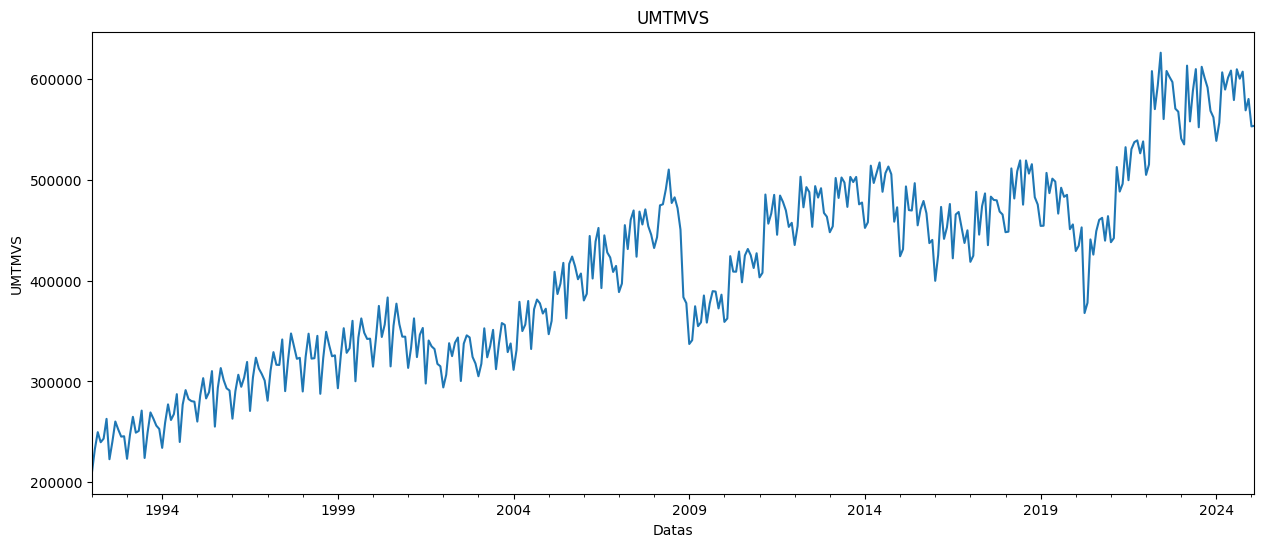

In [121]:
title = "UMTMVS"
label_x = "Datas"
label_y = "UMTMVS"
df["UMTMVS"].plot(title=title,figsize=(15,6),xlabel=label_x, ylabel=label_y)

Questão 3 \
Informe o aumento percentual do valor dos bens produzidos entre Janeiro de 2009 a Janeiro de 2019.

Dica 1: Considere este exemplo: Em 2009 a produção foi 10. Em 2019 foi 15. Qual foi o aumento percentual? ((15 - 10)/10)*100 = 50% \
Dica 2: Para lidar com os dados reais do dataframe use *loc*. Tente printar df.loc['2009-01-01']


In [122]:
pct2019 = df.loc["2019-01-01"]
pct2009 = df.loc["2009-01-01"]
res = (((pct2019['UMTMVS']-pct2009['UMTMVS'])*100)/pct2009)['UMTMVS']
print("Aumento de: " , res, "%")


Aumento de:  34.74270322544282 %


Questão 4 \
Informe a queda percentual do valor dos bens produzidos entre Janeiro de 2008 e Janeiro de 2009

In [123]:
pct2008 = df.loc["2008-01-01"]
pct2009 = df.loc["2009-01-01"]
res = (((pct2009['UMTMVS']-pct2008['UMTMVS'])*100)/pct2008)['UMTMVS']
print("Deminuicao de: " , res, "%")



Deminuicao de:  -22.022775481313047 %


Questão 5 \
Qual foi o mês com menor valor de UMTMVS após 2005.

In [124]:
df2005 = df["2005-01-01" : ]
df2005.idxmin(axis=0, skipna=True)['UMTMVS'] #após a crise de 2008

Timestamp('2009-01-01 00:00:00')

Questão 6 \
Exiba os 6 meses com maior valor de UMTMVS.

In [139]:
dfUMTMVS = pd.read_csv('UMTMVS.csv',  index_col="UMTMVS").sort_index()
dfUMTMVS.tail()


,observation_date
UMTMVS,
609560,2024-08-01
609697,2023-06-01
611986,2023-08-01
613157,2023-03-01
625963,2022-06-01


Questão 7 \
De quanto foi a queda em milhões de dólares nos produtos manufaturados em 2008? \
Outra forma de elaborar esta pergunta é: qual é a diferença do valor entre Janeiro de 2008 e Janeiro de 2009?

In [125]:
pct2008 = df.loc["2008-01-01"]
pct2009 = df.loc["2009-01-01"]
print("A diferença dos valores é de: " , pct2008["UMTMVS"] -  pct2009["UMTMVS"] , "Milhoes de dolares")

A diferença dos valores é de:  95206 Milhoes de dolares


Questão 8 \
Crie um gráfico de barra (blar plot) mostrando o valor médio por ano do valor dos produtos manufaturados.

/tmp/ipykernel_7371/3525640586.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule="A").mean().plot.bar();


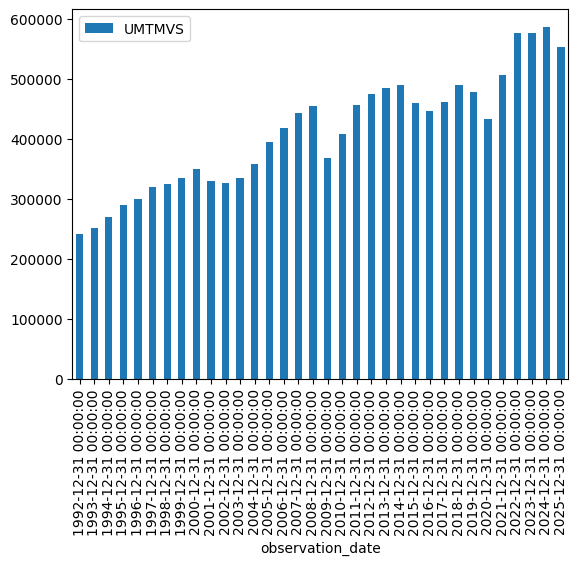

In [126]:
df.resample(rule="A").mean().plot.bar();

Questão 9 \
Plote a rolagem anual média sobre os dados originais. Lembre-se que os dados são mensais e que existem 12 meses num ano.

<Axes: xlabel='observation_date'>

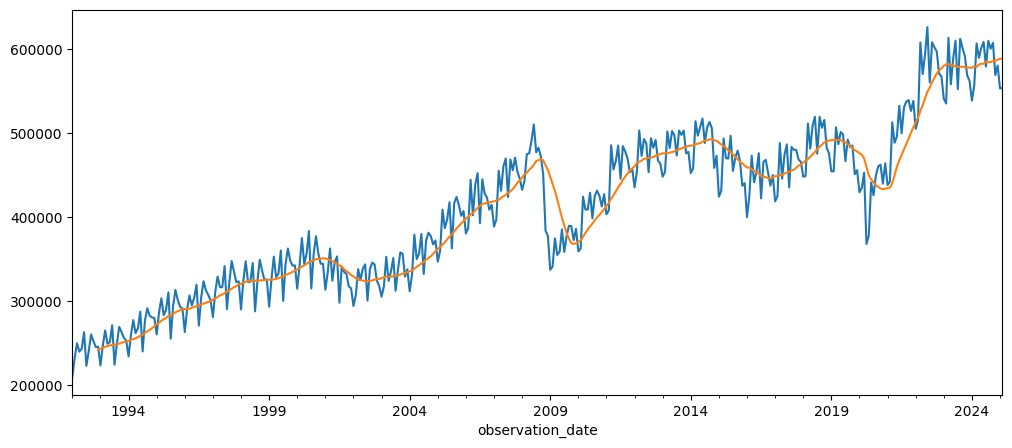

In [127]:
df["UMTMVS"].plot(figsize=(12,5)).autoscale(axis="x", tight=True)
df.rolling(window=12).mean()["UMTMVS"].plot()

Questão 10 \
Qual ano teve o maior aumento no valor médio em relação ao valor médio do ano anterior?

[Dica de um método útil para resolver essa questão](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [128]:
df.idxmax(axis=0, skipna=True)['UMTMVS']

Timestamp('2022-06-01 00:00:00')